In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing  import MinMaxScaler, StandardScaler

In [70]:
Startups = pd.read_csv("/content/50_Startups.csv")
Startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [71]:
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [72]:
# There are no Null Values in the DataSet.
Startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# OBJECTIVE: To prepare a prediction Model for profit of 50_Startups Data. Here our Target variable is "profit"

In [73]:
Startups['Profit'].value_counts()

118474.03    1
69758.98     1
81229.06     1
101004.64    1
124266.90    1
49490.75     1
192261.83    1
71498.49     1
156991.12    1
108733.99    1
78239.91     1
64926.08     1
144259.40    1
108552.04    1
97427.84     1
126992.93    1
105733.54    1
96712.80     1
96479.51     1
134307.35    1
99937.59     1
90708.19     1
182901.99    1
110352.25    1
42559.73     1
146121.95    1
89949.14     1
152211.77    1
35673.41     1
156122.51    1
166187.94    1
65200.33     1
149759.96    1
155752.60    1
191792.06    1
125370.37    1
107404.34    1
14681.40     1
111313.02    1
81005.76     1
105008.31    1
103282.38    1
132602.65    1
129917.04    1
122776.86    1
96778.92     1
77798.83     1
141585.52    1
191050.39    1
97483.56     1
Name: Profit, dtype: int64

In [74]:
# All the values are unique as the value counts for each is one

In [75]:
Startups['Profit'].unique()

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [76]:
# From the above we concluded that the variable "Profit" is a continuous Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


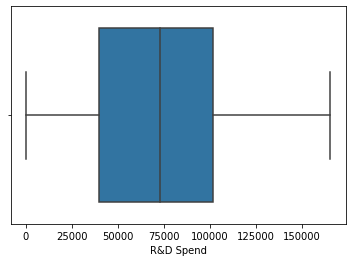

In [77]:
# Data Visualization through Boxplot Representation
# BOX-PLOT

sns.boxplot(Startups['R&D Spend'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


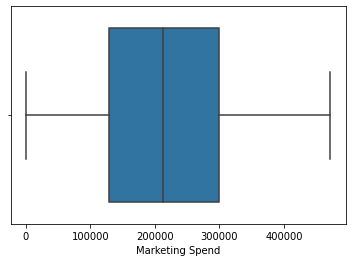

In [78]:
sns.boxplot(Startups['Marketing Spend'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


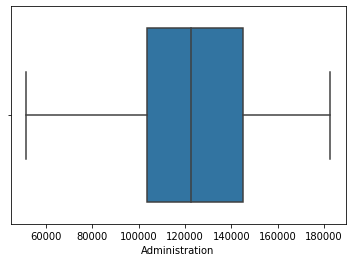

In [79]:
sns.boxplot(Startups['Administration'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


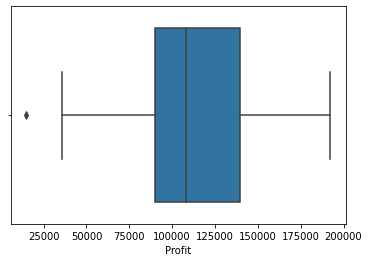

In [80]:
sns.boxplot(Startups['Profit'])

In [81]:
# From the above box plot representations we concluded that the varibale "Profit" has an outlier.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


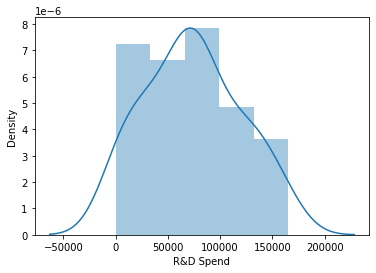

In [82]:
# Dist-Plot Representation
#DISTPLOT

sns.distplot(Startups['R&D Spend'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


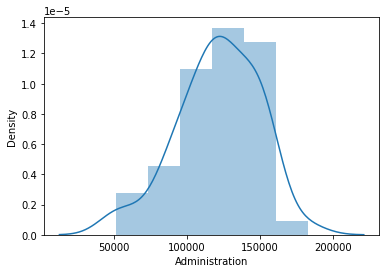

In [83]:
sns.distplot(Startups['Administration'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


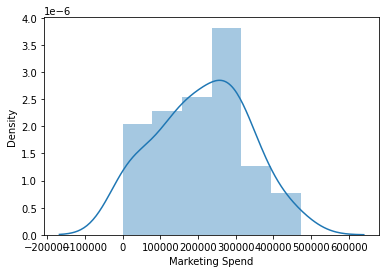

In [84]:
sns.distplot(Startups['Marketing Spend'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


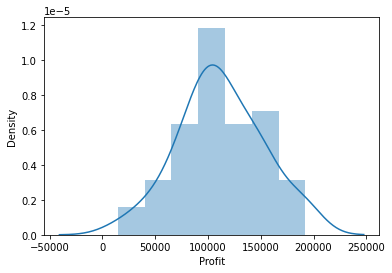

In [85]:
sns.distplot(Startups['Profit'])

In [86]:
# From the above distplot representation we came to know that our tarrget variable is positively skewed.

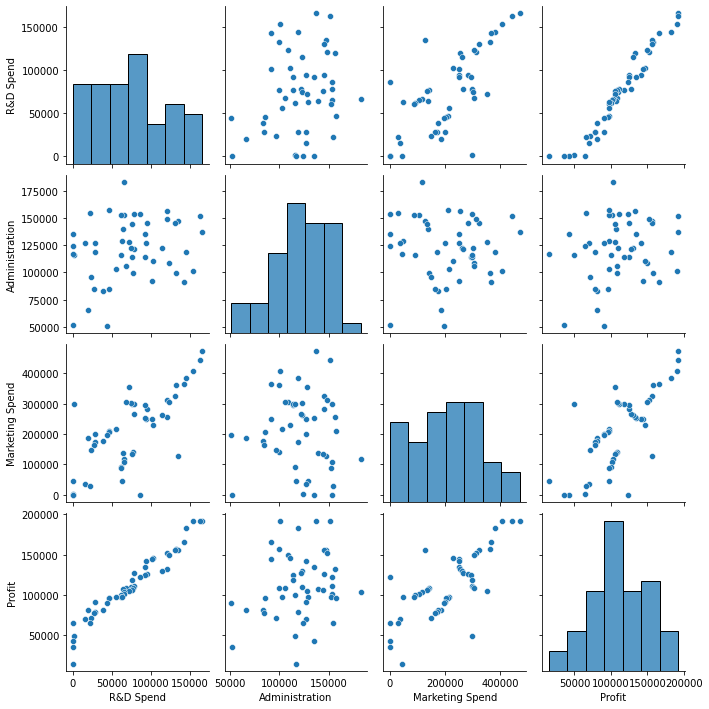

In [87]:
# Pair-Plot Representation
# PAIRPLOT

sns.pairplot(Startups)

In [88]:
# From the above pairplot we came to know that increase in R&D is results increase in Profit.(POSITIVE CORRELATION)
# The same is the case in Marketing Spend and R&D.

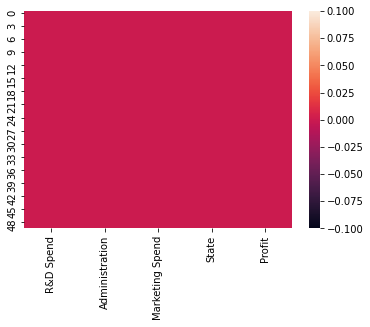

In [89]:
# Heat Map
sns.heatmap(Startups.isnull())

In [90]:
# The above heatmap suggests that there are no Missing Values in the Data.

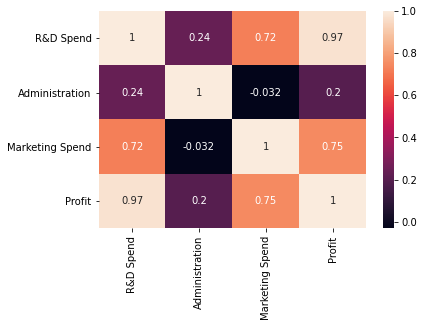

In [91]:
sns.heatmap(Startups.corr(), annot = True)

In [92]:
# As there is one Categorical Variable i.e., "State" so we'll describe it.

Startups['State'].describe()

count             50
unique             3
top       California
freq              17
Name: State, dtype: object

In [93]:
# The Total count is 50
# Number of unique states are 3.
# As it's a categorical variable we'll go for encoding Technique.

In [94]:
# ONE-HOT ENCODING

Startups = pd.get_dummies(Startups, columns=['State'])
Startups

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [95]:
Startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


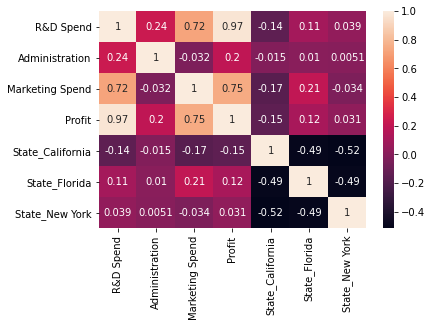

In [96]:
sns.heatmap(Startups.corr(), annot = True)

In [97]:
# We found a positive correlation (0.24) between "R&D" and "Administration" which is very low.
# There is a positive correlation (0.72) between "R&D" and "Marketing" Spend which is not very high.
# Also a High Positive Correlation (0.97) between "R&D" and "Profit" can be seen above.
# Correlation between "Marketing Spend" and "Administration" is negative (-0.032) which is very very less.
# The correlation between Profit and State California is negative and low & for rest of the states it's positive but very very less.

In [98]:
# Renaming of variables
Startups.rename(columns={'Marketing Spend':'Marketing_Spend'},inplace=True)
Startups.rename(columns={'R&D Spend':'RD_Spend'},inplace=True)
Startups.rename(columns={'State_New York':'State_New_York'},inplace=True)
Startups

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [99]:
# Standard Scaler
# we need to go for standard scale for the categorical dummiy variables.

Std = StandardScaler()
Startup_std = Std.fit_transform(Startups)
Startup_std = pd.DataFrame(Startup_std, columns = Startups.columns)
Startup_std.head()

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
0,2.016411,0.560753,2.153943,2.011203,-0.717741,-0.685994,1.393261
1,1.955860,1.082807,1.923600,1.999430,1.393261,-0.685994,-0.717741
2,1.754364,-0.728257,1.626528,1.980842,-0.717741,1.457738,-0.717741
3,1.554784,-0.096365,1.422210,1.776627,-0.717741,-0.685994,1.393261
4,1.504937,-1.079919,1.281528,1.357740,-0.717741,1.457738,-0.717741


In [102]:
# LINEAR REGRESSION MODEL BUILDING

Model1 = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State_California+State_Florida+State_New_York', Startup_std).fit()
Model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           1.34e-27
Time:                        11:38:59   Log-Likelihood:                 4.3255
No. Observations:                  50   AIC:                             3.349
Df Residuals:                      44   BIC:                             14.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.551e-16      0.033  -1.66e-14      1.000      -0.067       0.067
RD_Spend             0.9179      0.053     17.369      0.000       0.811       1.024
Administration      -0.0188      0.036     -0.517      0.608      -0.092       0.054
Marketing_Spend      0.0819      0.052      1.574      0.123      -0.023       0.187
State_California    -0.0006      0.023     -0.027      0.979      -0.046       0.045
State_Florida        0.0017      0.023      0.075      0.941      -0.045       0.048
State_New_York      -0.0011      0.022     -0.049      0.961      -0.046       0.044
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.09e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.22e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# We can see that the P value are > 0.05 in the variables- Administration, Marketing_Spend, State_California, State_Florida and State_New_York.
# We'll Have to build Simple Regression Model for each of thise variables to check it's efferct on "Profit".

In [103]:
Model1.tvalues # Calculating the T values

Intercept          -1.659260e-14
RD_Spend            1.736858e+01
Administration     -5.170116e-01
Marketing_Spend     1.573889e+00
State_California   -2.676515e-02
State_Florida       7.490466e-02
State_New_York     -4.931619e-02
dtype: float64

In [104]:
Model1.pvalues # Calculating the P values

Intercept           1.000000e+00
RD_Spend            2.578772e-21
Administration      6.077373e-01
Marketing_Spend     1.226769e-01
State_California    9.787681e-01
State_Florida       9.406301e-01
State_New_York      9.608905e-01
dtype: float64

In [106]:
# R-Squared and Adj.R-Squared Values
(Model1.rsquared, Model1.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [121]:
# SLR MODEL between Profit and RD_Spend

MODEL = smf.ols('Profit~RD_Spend', Startup_std).fit()
MODEL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           3.50e-32
Time:                        12:41:41   Log-Likelihood:                 2.2714
No. Observations:                  50   AIC:                           -0.5428
Df Residuals:                      48   BIC:                             3.281
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.274e-16      0.033  -1.58e-14      1.000      -0.067       0.067
RD_Spend       0.9729      0.033     29.151      0.000       0.906       1.040
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
# SLR MODEL between Profit and Administration

Model2 = smf.ols('Profit~Administration', Startup_std).fit()
Model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 04 Jun 2021   Prob (F-statistic):              0.162
Time:                        11:46:03   Log-Likelihood:                -69.919
No. Observations:                  50   AIC:                             143.8
Df Residuals:                      48   BIC:                             147.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.274e-16      0.141  -3.73e-15      1.000      -0.284       0.284
Administration     0.2007      0.141      1.419      0.162      -0.084       0.485
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# As the P-Value is very less so we'll not consider Administration variable for the prediction of profit.

In [108]:
# SLR MODEL between Profit and Marketing_Spend
Model3 = smf.ols('Profit~Marketing_Spend', Startup_std).fit()
Model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           4.38e-10
Time:                        11:47:43   Log-Likelihood:                -50.470
No. Observations:                  50   AIC:                             104.9
Df Residuals:                      48   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.274e-16      0.096   -5.5e-15      1.000      -0.193       0.193
Marketing_Spend     0.7478      0.096      7.803      0.000       0.555       0.940
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# The P-Value is 0 and the correlation is 0.75 approx, which concludes that Marketing Spend is dependent.

In [109]:
# SLR MODEL between Profit and State_California
Model4 = smf.ols('Profit~State_California', Startup_std).fit()
Model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.043
Date:                Fri, 04 Jun 2021   Prob (F-statistic):              0.312
Time:                        11:49:46   Log-Likelihood:                -70.409
No. Observations:                  50   AIC:                             144.8
Df Residuals:                      48   BIC:                             148.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.274e-16      0.143  -3.69e-15      1.000      -0.287       0.287
State_California    -0.1458      0.143     -1.021      0.312      -0.433       0.141
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.190
Skew:                           0.087   Prob(JB):                        0.909
Kurtosis:                       2.753   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# There is a negative correlation and the Pvalue is > 0.05 so State_California will not be considered

In [111]:
# SLR MODEL between Profit and State_Florida
Model5 = smf.ols('Profit~State_Florida', Startup_std).fit()
Model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Fri, 04 Jun 2021   Prob (F-statistic):              0.421
Time:                        11:50:59   Log-Likelihood:                -70.607
No. Observations:                  50   AIC:                             145.2
Df Residuals:                      48   BIC:                             149.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.274e-16      0.143  -3.68e-15      1.000      -0.288       0.288
State_Florida     0.1162      0.143      0.811      0.421      -0.172       0.404
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# The above shows a low positive correlation and p value is > 0.05 so Profit is indeoendent here.

In [112]:
#SLR MODEL between Profit and State_New_York
Model6 = smf.ols('Profit~State_New_York', Startup_std).fit()
Model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04727
Date:                Fri, 04 Jun 2021   Prob (F-statistic):              0.829
Time:                        11:52:01   Log-Likelihood:                -70.922
No. Observations:                  50   AIC:                             145.8
Df Residuals:                      48   BIC:                             149.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.274e-16      0.144  -3.66e-15      1.000      -0.290       0.290
State_New_York     0.0314      0.144      0.217      0.829      -0.259       0.321
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.082
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       2.807   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
# From the above we conclude that there is very very low correlation and the Pvalue is > 0.05 so same is the case here; we'll not consider it as well.

In [115]:
# VIF Sccore Calculation

RD = smf.ols('RD_Spend~Administration+Marketing_Spend+State_California+State_Florida+State_New_York',data=Startup_std).fit().rsquared  
vif_RD = 1/(1-RD)

ADMIN = smf.ols('Administration~RD_Spend+Marketing_Spend+State_California+State_Florida+State_New_York',data=Startup_std).fit().rsquared  
vif_ADMIN = 1/(1-ADMIN)

MARKETING = smf.ols('Marketing_Spend~RD_Spend+Administration+State_California+State_Florida+State_New_York',data=Startup_std).fit().rsquared  
vif_MARKETING = 1/(1-MARKETING) 

CALIFORNIA = smf.ols('State_California~RD_Spend+Administration+Marketing_Spend+State_Florida+State_New_York',data=Startup_std).fit().rsquared  
vif_CALIFORNIA = 1/(1-CALIFORNIA)

FLORIDA = smf.ols('State_Florida~RD_Spend+Administration+Marketing_Spend+State_California+State_New_York',data=Startup_std).fit().rsquared  
vif_FLORIDA = 1/(1-FLORIDA)

NEWYORK = smf.ols('State_New_York~RD_Spend+Administration+Marketing_Spend+State_California+State_Florida',data=Startup_std).fit().rsquared  
vif_NEWYORK = 1/(1-NEWYORK)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


In [117]:
# Storing vif values in a Data Frame
DF = {'Features':['RD_Spend','Administration','Marketing_Spend','State_California','State_Florida','State_New_York'],'VIF':[vif_RD,vif_ADMIN,vif_MARKETING,vif_CALIFORNIA,vif_FLORIDA,vif_NEWYORK]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Features,VIF
0,RD_Spend,2.495511
1,Administration,1.177766
2,Marketing_Spend,2.416797
3,State_California,inf
4,State_Florida,inf
5,State_New_York,inf


In [118]:
# There is No Collinearity between the states.
# We'll only consider RD_Spend and Marketing Spend for Model Building.

In [120]:
# SLR MODEL
# SLR Model between Profit, RD_Spend & Marketing_Spend

Model7 = smf.ols('Profit~RD_Spend+Marketing_Spend', Startups).fit()
Model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           2.16e-31
Time:                        12:39:03   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD_Spend            0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
# R-Squared values of RD_Spend & Marketing Spend
(MODEL.rsquared, Model3.rsquared)

(0.9465353160804392, 0.5591535746115515)

In [124]:
# AIC values of RD_Spend & Marketing Spend
(MODEL.aic, Model3.aic)

(-0.5428445147422991, 104.94091802371327)

In [125]:
# By comparing we conclude that the R-Squared Value of RD_Spend is More than it's AIC Value
# And R-Squared Value of Marketing_Spend is less than its AIC Value.

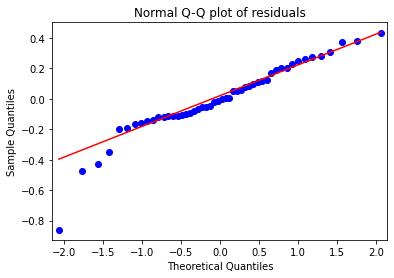

In [134]:
# QQ plot to check the Normality of Errors

qqplot=sm.qqplot(MODEL.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [135]:
# We'll remove the farthest Data Point.

In [138]:
# RESIDUAL PLOT

def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

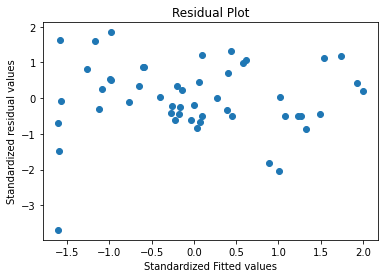

In [139]:
plt.scatter(get_standardized_values(MODEL.fittedvalues),
            get_standardized_values(MODEL.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [140]:
# The above data points following a linear relationship.

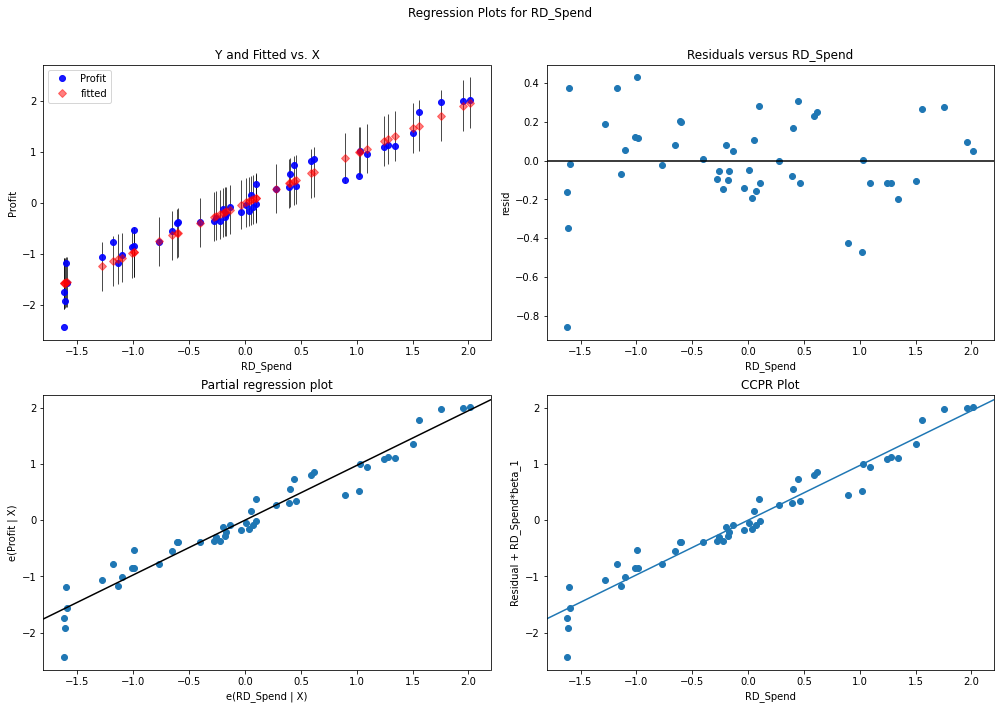

In [144]:
# Residuals VS Regressors
fig = plt.figure(figsize=(14,10))
fig = sm.graphics.plot_regress_exog(MODEL, "RD_Spend", fig=fig)
plt.show()

In [145]:
# There is no Error variance
# It's following Linearity.

In [149]:
# COOK's DISTANCE
# We'll Use Cook's Distance in order to detect outliers

Model8 = MODEL.get_influence()
(c, _) = Model8.cooks_distance
(c, _)

(array([2.75252280e-03, 9.89908565e-03, 6.51765486e-02, 4.92628317e-02,
        7.59828403e-03, 7.33387104e-03, 2.21412554e-02, 6.73661506e-03,
        1.01619773e-05, 5.81403631e-03, 1.66061312e-02, 1.36996956e-02,
        2.16575937e-02, 6.13884016e-03, 8.90397517e-02, 6.30133674e-02,
        1.51718150e-02, 2.94329347e-03, 1.35430569e-03, 8.88551585e-07,
        2.17640968e-03, 2.60842890e-03, 4.21074221e-04, 4.82942604e-04,
        4.68512581e-03, 1.19729011e-03, 6.88519548e-03, 3.72111671e-03,
        5.73468418e-04, 2.01430573e-03, 5.31240320e-04, 1.80999487e-03,
        4.12635748e-03, 1.56789281e-05, 1.04277371e-02, 1.08303093e-02,
        7.16494391e-02, 1.81926575e-03, 6.59971284e-02, 1.80059405e-04,
        5.21569633e-03, 6.02155910e-03, 1.40828291e-03, 1.85762695e-02,
        2.18683314e-03, 1.05297577e-01, 2.04992283e-04, 1.99584124e-02,
        8.98899423e-02, 5.62061026e-01]),
 array([0.99725142, 0.99015177, 0.93698481, 0.95197896, 0.9924317 ,
        0.99269407, 0.9781

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


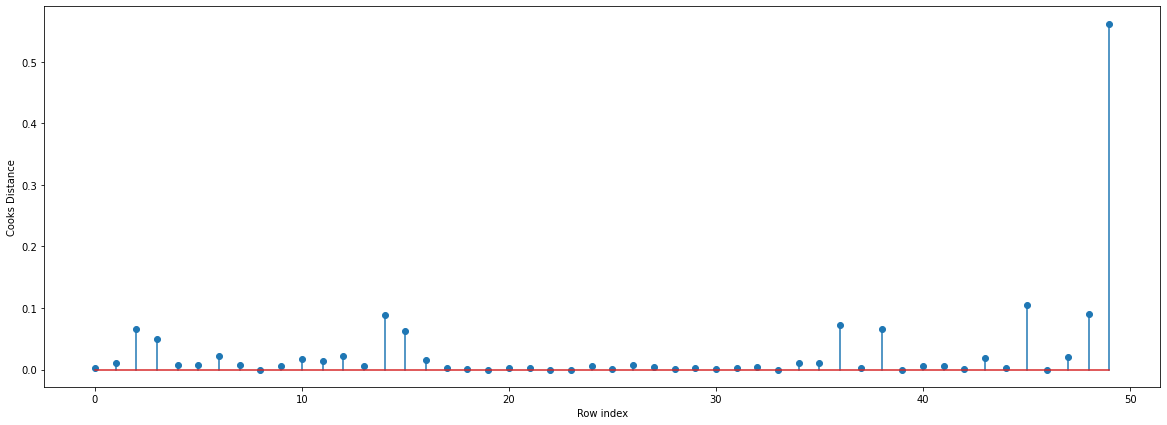

In [151]:
fig = plt.subplots(figsize=(20, 7)) 
plt.stem(np.arange(len(Startup_std)), np.round(c, 3)) 
plt.xlabel('Row index') 
plt.ylabel('Cooks Distance') 
plt.show()

In [152]:
# From the above we can see that the 49th point consist of an influencer We'll have to remove it.

In [155]:
Startup=Startup_std.drop(Startup_std.index[[49]],axis=0).reset_index()
Startup.tail()

,index,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
44,44,-1.134305,1.206419,-1.509074,-1.173209,1.393261,-0.685994,-0.717741
45,45,-1.600350,0.101254,-1.727400,-1.180082,-0.717741,-0.685994,1.393261
46,46,-1.593413,-0.199322,0.711122,-1.566922,-0.717741,1.457738,-0.717741
47,47,-1.622362,0.507722,-1.743127,-1.740627,1.393261,-0.685994,-0.717741
48,48,-1.610433,-2.509409,-1.743127,-1.913212,-0.717741,-0.685994,1.393261


In [157]:
# BUILDING THE FINAL MODEL

FINAL = smf.ols('Profit~RD_Spend', Startup).fit()
FINAL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           7.56e-34
Time:                        13:19:14   Log-Likelihood:                 10.434
No. Observations:                  49   AIC:                            -16.87
Df Residuals:                      47   BIC:                            -13.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0186      0.029      0.651      0.519      -0.039       0.076
RD_Spend       0.9428      0.029     32.477      0.000       0.884       1.001
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
# From the above Model we observed that r-squared and adjusted r-squared are similar.

In [161]:
new_data=pd.DataFrame({'RD_Spend':100000},index=[1])
FINAL.predict(new_data)

1    94277.81544
dtype: float64